<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/news_wire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass classification of news into topics using Reuters news dataset**

Import needed libraries

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

Import dataset

In [4]:
from keras.datasets import reuters

In [5]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words= 10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Explore dataset

In [8]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape 

((8982,), (8982,), (2246,), (2246,))

In [9]:
type(train_data), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [7]:
type(train_data[0]), type(train_label[0])

(list, numpy.int64)

In [10]:
len(train_data[0]), len(train_data[1])

(87, 56)

In [11]:
len_list  = [len(i) for i in train_data]
max(len_list)

2376

In [12]:
len_list = [len(i) for i in test_data]
max(len_list)

1032

In [17]:
len(np.unique(train_label)), len(np.unique(test_label))

(46, 46)

Preprocess data

In [14]:
from keras.preprocessing.sequence import pad_sequences

In [15]:
train_data = pad_sequences(train_data,
                          padding = 'post',
                          maxlen = 2376 ,
                          value = 0)

test_data = pad_sequences(test_data,
                          padding = 'post',
                          maxlen = 2376,
                          value = 0)

Build Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,GlobalAveragePooling1D

In [20]:
model = Sequential()
model.add(Embedding(10000, 64))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 46)                2990      
Total params: 651,310
Trainable params: 651,310
Non-trainable params: 0
_________________________________________________________________



Compile model

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy',
        b
              optimizer ='rmsprop',
              metrics = ['accuracy'])

Create Validation data

In [23]:
x_val = train_data[:3000]
y_val = train_label[:3000]
x_train = train_data[3000:]
y_train = train_label[3000:]

Fit data

In [35]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 512)

Epoch 1/10
12/12 [==============================] - 3s 272ms/step - loss: 0.2287 - accuracy: 0.9393 - val_loss: 2.5430 - val_accuracy: 0.7033
Epoch 2/10
12/12 [==============================] - 3s 266ms/step - loss: 0.2250 - accuracy: 0.9398 - val_loss: 2.5402 - val_accuracy: 0.7000
Epoch 3/10
12/12 [==============================] - 3s 266ms/step - loss: 0.2207 - accuracy: 0.9462 - val_loss: 2.7270 - val_accuracy: 0.6340
Epoch 4/10
12/12 [==============================] - 3s 266ms/step - loss: 0.2293 - accuracy: 0.9376 - val_loss: 2.5571 - val_accuracy: 0.6977
Epoch 5/10
12/12 [==============================] - 3s 266ms/step - loss: 0.2397 - accuracy: 0.9383 - val_loss: 2.7461 - val_accuracy: 0.7073
Epoch 6/10
12/12 [==============================] - 3s 268ms/step - loss: 0.2184 - accuracy: 0.9428 - val_loss: 2.7409 - val_accuracy: 0.7067
Epoch 7/10
12/12 [==============================] - 3s 269ms/step - loss: 0.2194 - accuracy: 0.9417 - val_loss: 2.5655 - val_accuracy: 0.6953
Epoch 

Visualize model performance

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

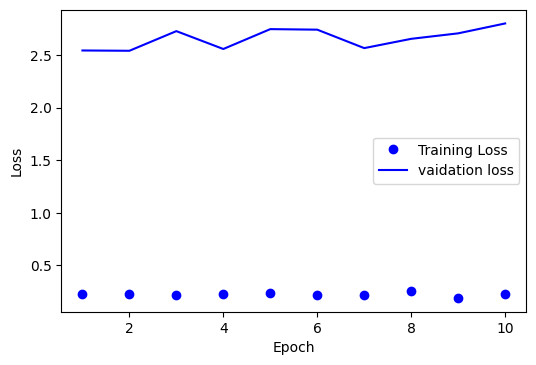

In [38]:
plt.figure(dpi = 100)
plt.plot(epochs, loss, 'bo' , label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'vaidation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Re-fit the model on the  train data 

In [48]:
model.fit(train_data, train_label, epochs = 10, batch_size= 128)

Epoch 1/10
71/71 [==============================] - 5s 68ms/step - loss: 0.6173 - accuracy: 0.8686
Epoch 2/10
71/71 [==============================] - 5s 69ms/step - loss: 0.6046 - accuracy: 0.8712
Epoch 3/10
71/71 [==============================] - 5s 69ms/step - loss: 0.6032 - accuracy: 0.8710
Epoch 4/10
71/71 [==============================] - 5s 69ms/step - loss: 0.5865 - accuracy: 0.8692
Epoch 5/10
71/71 [==============================] - 5s 69ms/step - loss: 0.5764 - accuracy: 0.8719
Epoch 6/10
71/71 [==============================] - 5s 68ms/step - loss: 0.5667 - accuracy: 0.8759
Epoch 7/10
71/71 [==============================] - 5s 68ms/step - loss: 0.5562 - accuracy: 0.8763
Epoch 8/10
71/71 [==============================] - 5s 69ms/step - loss: 0.5519 - accuracy: 0.8771
Epoch 9/10
71/71 [==============================] - 5s 68ms/step - loss: 0.5394 - accuracy: 0.8805
Epoch 10/10
71/71 [==============================] - 5s 68ms/step - loss: 0.5366 - accuracy: 0.8779


Evaluate model on test data

In [49]:
results = model.evaluate(test_data, test_label)

71/71 [==============================] - 1s 10ms/step - loss: 1.6769 - accuracy: 0.7079
